# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Нужно постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Также необходимо проверить *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><strong>Вывод</strong></a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Исследуем-1-ю-модель-(Логистическая-регрессия)" data-toc-modified-id="Исследуем-1-ю-модель-(Логистическая-регрессия)-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Исследуем <code>1-ю модель (Логистическая регрессия)</code></a></span></li><li><span><a href="#Исследуем-2-ю-модель-(Дерево-решений)" data-toc-modified-id="Исследуем-2-ю-модель-(Дерево-решений)-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Исследуем <code>2-ю модель (Дерево решений)</code></a></span></li><li><span><a href="#Исследуем-3-ю-модель-(Случайный-лес)" data-toc-modified-id="Исследуем-3-ю-модель-(Случайный-лес)-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Исследуем <code>3-ю модель (Случайный лес)</code></a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Первый-метод-борьбы-с-дисбалансом-мы-выбрали-применение-параметра-class_weight='balanced'." data-toc-modified-id="Первый-метод-борьбы-с-дисбалансом-мы-выбрали-применение-параметра-class_weight='balanced'.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Первый метод борьбы с дисбалансом мы выбрали применение параметра <code>class_weight='balanced'</code>.</a></span><ul class="toc-item"><li><span><a href="#Сначала-применяем-к-1-ой-модели-(логистическая-регрессия)" data-toc-modified-id="Сначала-применяем-к-1-ой-модели-(логистическая-регрессия)-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Сначала применяем к <code>1-ой модели (логистическая регрессия)</code></a></span></li><li><span><a href="#Исследуем-2-ю-модель-(Дерево-решений)" data-toc-modified-id="Исследуем-2-ю-модель-(Дерево-решений)-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Исследуем <code>2-ю модель (Дерево решений)</code></a></span></li><li><span><a href="#Исследуем-3-ю-модель-(Случайный-лес)" data-toc-modified-id="Исследуем-3-ю-модель-(Случайный-лес)-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Исследуем <code>3-ю модель (Случайный лес)</code></a></span></li></ul></li><li><span><a href="#Попытаемся-применить-второй-метод-борьбы-с-дисбалансом-а-именно-upsampling,-т.е-мы-будем-искуственно-увеличивать-размер-выборки." data-toc-modified-id="Попытаемся-применить-второй-метод-борьбы-с-дисбалансом-а-именно-upsampling,-т.е-мы-будем-искуственно-увеличивать-размер-выборки.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Попытаемся применить <strong>второй метод борьбы с дисбалансом</strong> а именно <code>upsampling</code>, т.е мы будем искуственно увеличивать размер выборки.</a></span><ul class="toc-item"><li><span><a href="#Теперь-применяем-полученные-данные-для-обучения-1-ой-модели-(логистическая-регрессия)" data-toc-modified-id="Теперь-применяем-полученные-данные-для-обучения-1-ой-модели-(логистическая-регрессия)-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Теперь применяем полученные данные для обучения <code>1-ой модели (логистическая регрессия)</code></a></span></li><li><span><a href="#Теперь-применяем-полученные-данные-для-обучения-2-ой-модели-(Дерево-решений)" data-toc-modified-id="Теперь-применяем-полученные-данные-для-обучения-2-ой-модели-(Дерево-решений)-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Теперь применяем полученные данные для обучения <code>2-ой модели (Дерево решений)</code></a></span></li><li><span><a href="#Теперь-применяем-полученные-данные-для-обучения-3-ей-модели-(Дерево-решений)" data-toc-modified-id="Теперь-применяем-полученные-данные-для-обучения-3-ей-модели-(Дерево-решений)-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Теперь применяем полученные данные для обучения 3-ей модели (Дерево решений)</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## 1. Подготовка данных

In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/datasets/Churn.csv')
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Первый делом я решил избавиться от ненужных данных при обучение поскольку такие данные будут лишь успложнять построенную модель и скорее всего приведут к ошибкам

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


Видно, что у нас есть пропущенные данные в колонке `tenure`, посмотрим на данные поближе чтобы понять если ли какие либо различия у этих обьектов от остальных, но прежде привёдём названия столбцов к нижнему регистру.

In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.describe()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.head(10)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [6]:
df[df.isna().any(axis=1)].head(10)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
30,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
82,543,France,Female,36,NaN,0.00,2,0,0,26019.59,0
85,652,Spain,Female,75,NaN,0.00,2,1,1,114675.75,0
94,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
99,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
111,538,Germany,Male,39,NaN,108055.10,2,1,0,27231.26,0


In [7]:
df[df.isna().any(axis=1)].describe()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,909.000000,909.000000,0.0,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,648.451045,38.647965,NaN,76117.341474,1.530253,0.710671,0.510451,99180.389373,0.201320
std,99.079381,9.785438,NaN,63105.690715,0.588452,0.453701,0.500166,56378.063765,0.401207
min,359.000000,18.000000,NaN,0.000000,1.000000,0.000000,0.000000,106.670000,0.000000
25%,580.000000,32.000000,NaN,0.000000,1.000000,0.000000,0.000000,49872.330000,0.000000
50%,647.000000,37.000000,NaN,96674.550000,1.000000,1.000000,1.000000,99444.020000,0.000000
75%,718.000000,43.000000,NaN,128554.980000,2.000000,1.000000,1.000000,145759.700000,0.000000
max,850.000000,92.000000,NaN,206663.750000,4.000000,1.000000,1.000000,199390.450000,1.000000


In [8]:
df.describe()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Данные с NaN в колонке `tenure` выглядят вполне нормально, поэтому было решено заменить их на рандомные значения чтобы не изменить распреление самих данных, и не потерять лишние данные. Посмотрим на распределение величин до и после

<AxesSubplot:>

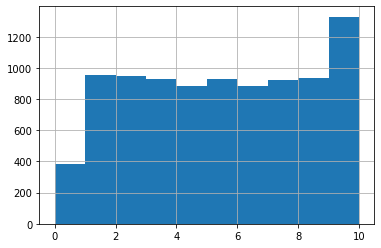

In [9]:
df['tenure'].hist()

In [10]:
import random

In [11]:
index_nan = df[df['tenure'].isna()]['tenure'].index

In [12]:
rand_list = []
for i in range(len(index_nan)):
    rand_list.append(random.randint(df['tenure'].min(), df['tenure'].max()))

In [13]:
rand_series = pd.Series(rand_list, index=index_nan)

In [14]:
df.loc[index_nan,'tenure'] = rand_series

<AxesSubplot:>

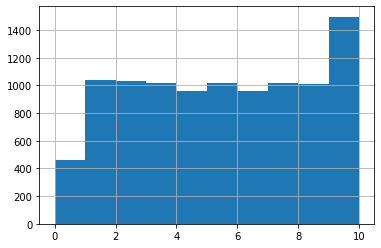

In [15]:
df['tenure'].hist()

Распределение на глаз почти не изменилось!

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  float64
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


**Добавил сверху код с заменой NaN на рандомные значения, само распределение не сильно(либо вовсе не) изменилось!** 

Заменим тип данных в колонке `tenure` с 'object' на 'int64'

In [17]:
df['tenure'] = df['tenure'].astype('int64')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Применили технику OHE для прямого декодирования данных

In [19]:
df = pd.get_dummies(df, drop_first=True)

In [20]:
df.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   creditscore        10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   tenure             10000 non-null  int64  
 3   balance            10000 non-null  float64
 4   numofproducts      10000 non-null  int64  
 5   hascrcard          10000 non-null  int64  
 6   isactivemember     10000 non-null  int64  
 7   estimatedsalary    10000 non-null  float64
 8   exited             10000 non-null  int64  
 9   geography_Germany  10000 non-null  uint8  
 10  geography_Spain    10000 non-null  uint8  
 11  gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


Теперь маштабируем данные для количественных признаков 

In [22]:
numeric = ['creditscore','age','tenure', 'balance', 'numofproducts', 'estimatedsalary']

In [23]:
scaler = StandardScaler()
scaler.fit(df[numeric])

StandardScaler()

In [24]:
df[numeric] = scaler.transform(df[numeric])

### **Вывод** 

Теперь после обработки данных можно их использовать для дальнейшего построения модели. Можно заметить что в данных присутствуют как категориальные признаки так и численные, поэтому применили технику OHE для прямого декодирования категориальных данных. Приступим к построению моделей


## 2. Исследование задачи

#### Исследуем `1-ю модель (Логистическая регрессия)`

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

Используем joblib для сохранения моделей

In [26]:
from tempfile import mkdtemp
import joblib
save_dir = mkdtemp()
import os 

In [27]:
features = df.drop(['exited'], axis=1)

In [28]:
target = df['exited']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
df_train, df_valid_n_test = train_test_split(df, test_size=0.4, random_state=12345)

In [31]:
df_valid, df_test = train_test_split(df_valid_n_test, test_size=0.5, random_state=12345)

In [32]:
features_train = df_train.drop(['exited'], axis=1)
target_train = df_train['exited']
features_valid = df_valid.drop(['exited'], axis=1)
target_valid = df_valid['exited']

In [33]:
print(df_train['exited'].value_counts())
print()
df_valid['exited'].value_counts()

0    4804
1    1196
Name: exited, dtype: int64



0    1582
1     418
Name: exited, dtype: int64

Можно заметить сразу **несбалансированность данных**, с которой мы будем бороться в след. пункте!

In [34]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train,target_train) 
predict_valid = model.predict(features_valid)
probabilities_one_valid = model.predict_proba(features_valid)[:,1]

print(f1_score(target_valid, predict_valid))
print('roc_auc_score =',roc_auc_score(target_valid, probabilities_one_valid))

0.33389544688026984
roc_auc_score = 0.7581872017130519


Сохраняем модель

In [35]:
filename_logistic_reg = os.path.join(save_dir, 'model.joblib.log.reg')
joblib.dump(model, filename_logistic_reg)

['/tmp/tmp4yask5cm/model.joblib.log.reg']

Итак модель создали, поиграем теперь со значением threshold 

In [36]:
probabilities_valid = joblib.load(filename_logistic_reg).predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_f1 = 0
best_threshold = 0

for threshold in np.arange(0, 0.7, 0.005):
    predicted_valid = probabilities_one_valid > threshold
    f1_score_val = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | f1 = {:.3f}".format(
        threshold, f1_score_val))
    if best_f1 < f1_score_val:
        best_threshold = threshold
        best_f1 = f1_score_val

Порог = 0.00 | f1 = 0.346
Порог = 0.01 | f1 = 0.346
Порог = 0.01 | f1 = 0.346
Порог = 0.01 | f1 = 0.347
Порог = 0.02 | f1 = 0.348
Порог = 0.03 | f1 = 0.352
Порог = 0.03 | f1 = 0.358
Порог = 0.04 | f1 = 0.363
Порог = 0.04 | f1 = 0.369
Порог = 0.04 | f1 = 0.375
Порог = 0.05 | f1 = 0.380
Порог = 0.06 | f1 = 0.382
Порог = 0.06 | f1 = 0.391
Порог = 0.07 | f1 = 0.394
Порог = 0.07 | f1 = 0.398
Порог = 0.07 | f1 = 0.403
Порог = 0.08 | f1 = 0.406
Порог = 0.09 | f1 = 0.407
Порог = 0.09 | f1 = 0.413
Порог = 0.10 | f1 = 0.416
Порог = 0.10 | f1 = 0.423
Порог = 0.10 | f1 = 0.423
Порог = 0.11 | f1 = 0.428
Порог = 0.12 | f1 = 0.437
Порог = 0.12 | f1 = 0.444
Порог = 0.12 | f1 = 0.448
Порог = 0.13 | f1 = 0.456
Порог = 0.14 | f1 = 0.462
Порог = 0.14 | f1 = 0.462
Порог = 0.14 | f1 = 0.464
Порог = 0.15 | f1 = 0.461
Порог = 0.15 | f1 = 0.465
Порог = 0.16 | f1 = 0.466
Порог = 0.17 | f1 = 0.469
Порог = 0.17 | f1 = 0.474
Порог = 0.18 | f1 = 0.480
Порог = 0.18 | f1 = 0.480
Порог = 0.18 | f1 = 0.480
Порог = 0.19

In [37]:
print('best f1_score: {} ,\nbest threshold : {}'.format(best_f1, best_threshold))

best f1_score: 0.49758919961427195 ,
best threshold : 0.24


Видно что при изменение порога увеличивается значение f1 метрики!

#### Исследуем `2-ю модель (Дерево решений)`

Подбираем оптимальную модель перебирая гиперпараметры, в данном случае max_depth

In [38]:
best_res = 0
best_model = None
for i in range(1,20):
    model = DecisionTreeClassifier(random_state = 12345,max_depth=i)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    res = f1_score(target_valid, predictions)
    print('max_depth = {} :'.format(i), res)
    if res > best_res:
        best_res = res
        best_model = model


max_depth = 1 : 0.0
max_depth = 2 : 0.5217391304347825
max_depth = 3 : 0.4234875444839857
max_depth = 4 : 0.5528700906344411
max_depth = 5 : 0.5406249999999999
max_depth = 6 : 0.5696969696969697
max_depth = 7 : 0.5320813771517998
max_depth = 8 : 0.5435114503816794
max_depth = 9 : 0.5637393767705382
max_depth = 10 : 0.5379310344827586
max_depth = 11 : 0.5153538050734313
max_depth = 12 : 0.5000000000000001
max_depth = 13 : 0.5032092426187419
max_depth = 14 : 0.5012468827930175
max_depth = 15 : 0.5
max_depth = 16 : 0.5012224938875306
max_depth = 17 : 0.5024271844660193
max_depth = 18 : 0.49818621523579204
max_depth = 19 : 0.48984468339307047


In [39]:
print('best f1_score for DecisionTree =', best_res)

best f1_score for DecisionTree = 0.5696969696969697


In [40]:
filename_decision_tree = os.path.join(save_dir, 'model.joblib.decision_tree')
joblib.dump(best_model, filename_decision_tree)

['/tmp/tmp4yask5cm/model.joblib.decision_tree']

In [41]:
probabilities_valid = joblib.load(filename_decision_tree).predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_f1 = 0
best_threshold = 0

for threshold in np.arange(0, 0.7, 0.005):
    predicted_valid = probabilities_one_valid > threshold
    f1_score_val = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | f1 = {:.3f}".format(
        threshold, f1_score_val))
    if best_f1 < f1_score_val:
        best_threshold = threshold
        best_f1 = f1_score_val

Порог = 0.00 | f1 = 0.342
Порог = 0.01 | f1 = 0.342
Порог = 0.01 | f1 = 0.342
Порог = 0.01 | f1 = 0.398
Порог = 0.02 | f1 = 0.398
Порог = 0.03 | f1 = 0.398
Порог = 0.03 | f1 = 0.397
Порог = 0.04 | f1 = 0.397
Порог = 0.04 | f1 = 0.397
Порог = 0.04 | f1 = 0.408
Порог = 0.05 | f1 = 0.408
Порог = 0.06 | f1 = 0.408
Порог = 0.06 | f1 = 0.408
Порог = 0.07 | f1 = 0.408
Порог = 0.07 | f1 = 0.456
Порог = 0.07 | f1 = 0.531
Порог = 0.08 | f1 = 0.531
Порог = 0.09 | f1 = 0.537
Порог = 0.09 | f1 = 0.537
Порог = 0.10 | f1 = 0.537
Порог = 0.10 | f1 = 0.537
Порог = 0.10 | f1 = 0.537
Порог = 0.11 | f1 = 0.537
Порог = 0.12 | f1 = 0.537
Порог = 0.12 | f1 = 0.535
Порог = 0.12 | f1 = 0.535
Порог = 0.13 | f1 = 0.535
Порог = 0.14 | f1 = 0.535
Порог = 0.14 | f1 = 0.535
Порог = 0.14 | f1 = 0.535
Порог = 0.15 | f1 = 0.535
Порог = 0.15 | f1 = 0.535
Порог = 0.16 | f1 = 0.535
Порог = 0.17 | f1 = 0.535
Порог = 0.17 | f1 = 0.535
Порог = 0.18 | f1 = 0.530
Порог = 0.18 | f1 = 0.530
Порог = 0.18 | f1 = 0.530
Порог = 0.19

In [42]:
print('best f1_score: {} ,\nbest threshold : {}'.format(best_f1, best_threshold))

best f1_score: 0.5987577639751551 ,
best threshold : 0.26


Опять как и в предыдущем случае значение f1_score увеличивается при снижение порога!

#### Исследуем `3-ю модель (Случайный лес)`

Подбираем оптимальную модель перебирая гиперпараметры, в данном случае n_estimators

In [43]:
best_model = None
best_result = 0
for est in range(1, 30):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid)
    res = f1_score(target_valid, predictions) 
    print('number_estimator = {} :'.format(est), res)
    if res > best_result:
        best_model = model 
        best_result = res

number_estimator = 1 : 0.5105882352941177
number_estimator = 2 : 0.428341384863124
number_estimator = 3 : 0.5384615384615384
number_estimator = 4 : 0.49149922720247297
number_estimator = 5 : 0.545201668984701
number_estimator = 6 : 0.5161290322580645
number_estimator = 7 : 0.5673758865248227
number_estimator = 8 : 0.5424242424242425
number_estimator = 9 : 0.5857142857142856
number_estimator = 10 : 0.5688622754491017
number_estimator = 11 : 0.584045584045584
number_estimator = 12 : 0.5610859728506787
number_estimator = 13 : 0.5730659025787965
number_estimator = 14 : 0.5671191553544495
number_estimator = 15 : 0.5805515239477503
number_estimator = 16 : 0.5761194029850746
number_estimator = 17 : 0.5747800586510264
number_estimator = 18 : 0.572289156626506
number_estimator = 19 : 0.581021897810219
number_estimator = 20 : 0.5735735735735735
number_estimator = 21 : 0.5781021897810219
number_estimator = 22 : 0.5688350983358548
number_estimator = 23 : 0.5873715124816447
number_estimator = 24 : 

In [44]:
print('best f1_score for Random Forest = ', best_result)

best f1_score for Random Forest =  0.5873715124816447


In [45]:
filename_random_forest = os.path.join(save_dir, 'model.joblib.random_forest')
joblib.dump(best_model, filename_random_forest)

['/tmp/tmp4yask5cm/model.joblib.random_forest']

In [46]:
joblib.load(filename_random_forest)

RandomForestClassifier(n_estimators=23, random_state=12345)

In [47]:
probabilities_valid = joblib.load(filename_random_forest).predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_f1 = 0
best_threshold = 0

for threshold in np.arange(0, 0.7, 0.005):
    predicted_valid = probabilities_one_valid > threshold
    f1_score_val = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | f1 = {:.3f}".format(
        threshold, f1_score_val))
    if best_f1 < f1_score_val:
        best_threshold = threshold
        best_f1 = f1_score_val

Порог = 0.00 | f1 = 0.395
Порог = 0.01 | f1 = 0.395
Порог = 0.01 | f1 = 0.395
Порог = 0.01 | f1 = 0.395
Порог = 0.02 | f1 = 0.395
Порог = 0.03 | f1 = 0.395
Порог = 0.03 | f1 = 0.395
Порог = 0.04 | f1 = 0.395
Порог = 0.04 | f1 = 0.395
Порог = 0.04 | f1 = 0.441
Порог = 0.05 | f1 = 0.441
Порог = 0.06 | f1 = 0.441
Порог = 0.06 | f1 = 0.441
Порог = 0.07 | f1 = 0.441
Порог = 0.07 | f1 = 0.441
Порог = 0.07 | f1 = 0.441
Порог = 0.08 | f1 = 0.441
Порог = 0.09 | f1 = 0.441
Порог = 0.09 | f1 = 0.483
Порог = 0.10 | f1 = 0.483
Порог = 0.10 | f1 = 0.483
Порог = 0.10 | f1 = 0.483
Порог = 0.11 | f1 = 0.483
Порог = 0.12 | f1 = 0.483
Порог = 0.12 | f1 = 0.483
Порог = 0.12 | f1 = 0.483
Порог = 0.13 | f1 = 0.483
Порог = 0.14 | f1 = 0.513
Порог = 0.14 | f1 = 0.513
Порог = 0.14 | f1 = 0.513
Порог = 0.15 | f1 = 0.513
Порог = 0.15 | f1 = 0.513
Порог = 0.16 | f1 = 0.513
Порог = 0.17 | f1 = 0.513
Порог = 0.17 | f1 = 0.513
Порог = 0.18 | f1 = 0.560
Порог = 0.18 | f1 = 0.560
Порог = 0.18 | f1 = 0.560
Порог = 0.19

In [48]:
print('best f1_score: {} ,\nbest threshold : {}'.format(best_f1, best_threshold))

best f1_score: 0.6057142857142858 ,
best threshold : 0.305


## 3. Борьба с дисбалансом

### Первый метод борьбы с дисбалансом мы выбрали применение параметра `class_weight='balanced'`.

#### Сначала применяем к `1-ой модели (логистическая регрессия)`

In [49]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train,target_train) 
predict_valid = model.predict(features_valid)
probabilities_one_valid = model.predict_proba(features_valid)[:,1]

print('f1_score =',f1_score(target_valid, predict_valid))
print('roc_auc_score =',roc_auc_score(target_valid, probabilities_one_valid))

f1_score = 0.4888507718696398
roc_auc_score = 0.7631442846859707


Метрика достаточно сильно изменилась в сравенение с метрикой (без изменения threshold) у модели без данного параметра, но такого значения всё равно не достаточно в условиях данной задачи.

In [50]:
filename_logistic_reg_weighted = os.path.join(save_dir, 'model.joblib.log.reg.weight')
joblib.dump(model, filename_logistic_reg_weighted)

['/tmp/tmp4yask5cm/model.joblib.log.reg.weight']

Перебираем значения threshold

In [51]:
best_f1 = 0
best_threshold = 0
best_roc = 0

for threshold in np.arange(0, 0.7, 0.005):
    predicted_valid = probabilities_one_valid > threshold
    f1_score_val = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | f1 = {:.3f}".format(
        threshold, f1_score_val))
    if best_f1 < f1_score_val:
        best_threshold = threshold
        best_f1 = f1_score_val

Порог = 0.00 | f1 = 0.346
Порог = 0.01 | f1 = 0.346
Порог = 0.01 | f1 = 0.346
Порог = 0.01 | f1 = 0.346
Порог = 0.02 | f1 = 0.346
Порог = 0.03 | f1 = 0.346
Порог = 0.03 | f1 = 0.346
Порог = 0.04 | f1 = 0.346
Порог = 0.04 | f1 = 0.346
Порог = 0.04 | f1 = 0.346
Порог = 0.05 | f1 = 0.346
Порог = 0.06 | f1 = 0.347
Порог = 0.06 | f1 = 0.347
Порог = 0.07 | f1 = 0.347
Порог = 0.07 | f1 = 0.348
Порог = 0.07 | f1 = 0.349
Порог = 0.08 | f1 = 0.349
Порог = 0.09 | f1 = 0.351
Порог = 0.09 | f1 = 0.352
Порог = 0.10 | f1 = 0.353
Порог = 0.10 | f1 = 0.354
Порог = 0.10 | f1 = 0.356
Порог = 0.11 | f1 = 0.357
Порог = 0.12 | f1 = 0.358
Порог = 0.12 | f1 = 0.359
Порог = 0.12 | f1 = 0.361
Порог = 0.13 | f1 = 0.364
Порог = 0.14 | f1 = 0.366
Порог = 0.14 | f1 = 0.368
Порог = 0.14 | f1 = 0.369
Порог = 0.15 | f1 = 0.371
Порог = 0.15 | f1 = 0.374
Порог = 0.16 | f1 = 0.375
Порог = 0.17 | f1 = 0.376
Порог = 0.17 | f1 = 0.376
Порог = 0.18 | f1 = 0.378
Порог = 0.18 | f1 = 0.380
Порог = 0.18 | f1 = 0.381
Порог = 0.19

In [52]:
print('best f1_score: {} ,\nbest threshold : {}'.format(best_f1, best_threshold))

best f1_score: 0.5010845986984815 ,
best threshold : 0.615


#### Исследуем `2-ю модель (Дерево решений)`

Подбираем оптимальную модель перебирая гиперпараметры, в данном случае max_depth

In [53]:
best_res = 0
best_model = None
for i in range(1,20):
    model = DecisionTreeClassifier(random_state = 12345,max_depth=i, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    res = f1_score(target_valid, predictions)
    print('max_depth = {} :'.format(i), res)
    if res > best_res:
        best_res = res
        best_model = model

        

max_depth = 1 : 0.4994903160040775
max_depth = 2 : 0.541015625
max_depth = 3 : 0.541015625
max_depth = 4 : 0.5277777777777778
max_depth = 5 : 0.5963791267305644
max_depth = 6 : 0.5574387947269304
max_depth = 7 : 0.5443786982248521
max_depth = 8 : 0.5365853658536586
max_depth = 9 : 0.5326829268292683
max_depth = 10 : 0.5126760563380283
max_depth = 11 : 0.5431841831425599
max_depth = 12 : 0.5145145145145146
max_depth = 13 : 0.5197860962566844
max_depth = 14 : 0.4988814317673378
max_depth = 15 : 0.4965675057208238
max_depth = 16 : 0.485981308411215
max_depth = 17 : 0.4844868735083532
max_depth = 18 : 0.4914841849148419
max_depth = 19 : 0.48375451263537905


In [54]:
predict_valid = best_model.predict(features_valid)
probabilities_one_valid = best_model.predict_proba(features_valid)[:,1]
print('f1_score =',f1_score(target_valid, predict_valid))
print('roc_auc_score =',roc_auc_score(target_valid, probabilities_one_valid))

f1_score = 0.5963791267305644
roc_auc_score = 0.8310244134068074


В целом значения метрики уже удовлетворяет условиям задачи но посмотрим еще на другие методы, может найдем что-то получше)

In [55]:
filename_decision_tree_weighted = os.path.join(save_dir, 'model.joblib.decision.tree.weight')
joblib.dump(best_model, filename_decision_tree_weighted)

['/tmp/tmp4yask5cm/model.joblib.decision.tree.weight']

In [56]:
from sklearn.metrics import f1_score
model = DecisionTreeClassifier(random_state=12345, max_depth=5, class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_f1 = 0
best_threshold = 0

for threshold in np.arange(0, 0.7, 0.005):
    predicted_valid = probabilities_one_valid > threshold
    f1_score_val = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | f1 = {:.3f}".format(
        threshold, f1_score_val))
    if best_f1 < f1_score_val:
        best_threshold = threshold
        best_f1 = f1_score_val

Порог = 0.00 | f1 = 0.345
Порог = 0.01 | f1 = 0.345
Порог = 0.01 | f1 = 0.345
Порог = 0.01 | f1 = 0.345
Порог = 0.02 | f1 = 0.345
Порог = 0.03 | f1 = 0.345
Порог = 0.03 | f1 = 0.383
Порог = 0.04 | f1 = 0.383
Порог = 0.04 | f1 = 0.383
Порог = 0.04 | f1 = 0.383
Порог = 0.05 | f1 = 0.383
Порог = 0.06 | f1 = 0.383
Порог = 0.06 | f1 = 0.383
Порог = 0.07 | f1 = 0.383
Порог = 0.07 | f1 = 0.383
Порог = 0.07 | f1 = 0.383
Порог = 0.08 | f1 = 0.383
Порог = 0.09 | f1 = 0.383
Порог = 0.09 | f1 = 0.383
Порог = 0.10 | f1 = 0.383
Порог = 0.10 | f1 = 0.383
Порог = 0.10 | f1 = 0.383
Порог = 0.11 | f1 = 0.383
Порог = 0.12 | f1 = 0.383
Порог = 0.12 | f1 = 0.383
Порог = 0.12 | f1 = 0.401
Порог = 0.13 | f1 = 0.401
Порог = 0.14 | f1 = 0.401
Порог = 0.14 | f1 = 0.401
Порог = 0.14 | f1 = 0.401
Порог = 0.15 | f1 = 0.401
Порог = 0.15 | f1 = 0.401
Порог = 0.16 | f1 = 0.412
Порог = 0.17 | f1 = 0.413
Порог = 0.17 | f1 = 0.413
Порог = 0.18 | f1 = 0.413
Порог = 0.18 | f1 = 0.413
Порог = 0.18 | f1 = 0.413
Порог = 0.19

In [57]:
print('best f1_score: {} ,\nbest threshold : {}'.format(best_f1, best_threshold))

best f1_score: 0.6082004555808656 ,
best threshold : 0.5650000000000001


#### Исследуем `3-ю модель (Случайный лес)`

Подбираем оптимальную модель перебирая гиперпараметры, в данном случае `n_estimators`

In [58]:
from sklearn.ensemble import RandomForestRegressor
best_model = None
best_result = 0
for est in range(1, 30):
    model = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight='balanced') 
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid)
    res = f1_score(target_valid, predictions) 
    print('number_estimator = {} :'.format(est), res)
    if res > best_result:
        best_model = model 
        best_result = res

number_estimator = 1 : 0.49017341040462425
number_estimator = 2 : 0.4422110552763819
number_estimator = 3 : 0.5347593582887701
number_estimator = 4 : 0.48064516129032253
number_estimator = 5 : 0.5505617977528091
number_estimator = 6 : 0.514820592823713
number_estimator = 7 : 0.5538020086083213
number_estimator = 8 : 0.5217391304347826
number_estimator = 9 : 0.5552325581395349
number_estimator = 10 : 0.5292307692307692
number_estimator = 11 : 0.5617647058823529
number_estimator = 12 : 0.5421133231240429
number_estimator = 13 : 0.5494830132939438
number_estimator = 14 : 0.5292307692307692
number_estimator = 15 : 0.5446428571428572
number_estimator = 16 : 0.5273010920436817
number_estimator = 17 : 0.5555555555555555
number_estimator = 18 : 0.529595015576324
number_estimator = 19 : 0.5361445783132529
number_estimator = 20 : 0.5271317829457365
number_estimator = 21 : 0.5473684210526316
number_estimator = 22 : 0.5267993874425727
number_estimator = 23 : 0.5481927710843373
number_estimator = 2

In [59]:
predict_valid = best_model.predict(features_valid)
probabilities_one_valid = best_model.predict_proba(features_valid)[:,1]
print('f1_score =',f1_score(target_valid, predict_valid))
print('roc_auc_score =',roc_auc_score(target_valid, probabilities_one_valid))

f1_score = 0.5617647058823529
roc_auc_score = 0.8111302996025865


In [60]:
filename_random_forest_weighted = os.path.join(save_dir, 'model.joblib.random.forest.weighted')
joblib.dump(best_model, filename_random_forest_weighted)

['/tmp/tmp4yask5cm/model.joblib.random.forest.weighted']

In [61]:
probabilities_valid = joblib.load(filename_random_forest_weighted).predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_f1 = 0
best_threshold = 0

for threshold in np.arange(0, 0.7, 0.005):
    predicted_valid = probabilities_one_valid > threshold
    f1_score_val = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | f1 = {:.3f}".format(
        threshold, f1_score_val))
    if best_f1 < f1_score_val:
        best_threshold = threshold
        best_f1 = f1_score_val

Порог = 0.00 | f1 = 0.438
Порог = 0.01 | f1 = 0.438
Порог = 0.01 | f1 = 0.438
Порог = 0.01 | f1 = 0.438
Порог = 0.02 | f1 = 0.438
Порог = 0.03 | f1 = 0.438
Порог = 0.03 | f1 = 0.438
Порог = 0.04 | f1 = 0.438
Порог = 0.04 | f1 = 0.438
Порог = 0.04 | f1 = 0.438
Порог = 0.05 | f1 = 0.438
Порог = 0.06 | f1 = 0.438
Порог = 0.06 | f1 = 0.438
Порог = 0.07 | f1 = 0.438
Порог = 0.07 | f1 = 0.438
Порог = 0.07 | f1 = 0.438
Порог = 0.08 | f1 = 0.438
Порог = 0.09 | f1 = 0.438
Порог = 0.09 | f1 = 0.438
Порог = 0.10 | f1 = 0.505
Порог = 0.10 | f1 = 0.505
Порог = 0.10 | f1 = 0.505
Порог = 0.11 | f1 = 0.505
Порог = 0.12 | f1 = 0.505
Порог = 0.12 | f1 = 0.505
Порог = 0.12 | f1 = 0.505
Порог = 0.13 | f1 = 0.505
Порог = 0.14 | f1 = 0.505
Порог = 0.14 | f1 = 0.505
Порог = 0.14 | f1 = 0.505
Порог = 0.15 | f1 = 0.505
Порог = 0.15 | f1 = 0.505
Порог = 0.16 | f1 = 0.505
Порог = 0.17 | f1 = 0.505
Порог = 0.17 | f1 = 0.505
Порог = 0.18 | f1 = 0.505
Порог = 0.18 | f1 = 0.505
Порог = 0.18 | f1 = 0.574
Порог = 0.19

In [62]:
print('best f1_score: {} ,\nbest threshold : {}'.format(best_f1, best_threshold))

best f1_score: 0.5990888382687928 ,
best threshold : 0.275


### Попытаемся применить **второй метод борьбы с дисбалансом** а именно `upsampling`, т.е мы будем искуственно увеличивать размер выборки. 

In [63]:
from sklearn.utils import shuffle

In [64]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [65]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

#### Теперь применяем полученные данные для обучения `1-ой модели (логистическая регрессия)`

In [66]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled,target_upsampled) 
predict_valid = model.predict(features_valid)
probabilities_one_valid = model.predict_proba(features_valid)[:,1]

print(f1_score(target_valid, predict_valid))
print('roc_auc_score =',roc_auc_score(target_valid, probabilities_one_valid))

0.4888507718696398
roc_auc_score = 0.763109503444855


In [67]:
filename_logistic_reg_upsampling = os.path.join(save_dir, 'model.joblib.log.reg.up')
joblib.dump(model, filename_logistic_reg_upsampling)

['/tmp/tmp4yask5cm/model.joblib.log.reg.up']

In [68]:
probabilities_valid = joblib.load(filename_logistic_reg_upsampling).predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_f1 = 0
best_threshold = 0

for threshold in np.arange(0, 0.7, 0.005):
    predicted_valid = probabilities_one_valid > threshold
    f1_score_val = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | f1 = {:.3f}".format(
        threshold, f1_score_val))
    if best_f1 < f1_score_val:
        best_threshold = threshold
        best_f1 = f1_score_val

Порог = 0.00 | f1 = 0.346
Порог = 0.01 | f1 = 0.346
Порог = 0.01 | f1 = 0.346
Порог = 0.01 | f1 = 0.346
Порог = 0.02 | f1 = 0.346
Порог = 0.03 | f1 = 0.346
Порог = 0.03 | f1 = 0.346
Порог = 0.04 | f1 = 0.346
Порог = 0.04 | f1 = 0.346
Порог = 0.04 | f1 = 0.346
Порог = 0.05 | f1 = 0.346
Порог = 0.06 | f1 = 0.347
Порог = 0.06 | f1 = 0.347
Порог = 0.07 | f1 = 0.347
Порог = 0.07 | f1 = 0.348
Порог = 0.07 | f1 = 0.349
Порог = 0.08 | f1 = 0.349
Порог = 0.09 | f1 = 0.351
Порог = 0.09 | f1 = 0.352
Порог = 0.10 | f1 = 0.353
Порог = 0.10 | f1 = 0.354
Порог = 0.10 | f1 = 0.356
Порог = 0.11 | f1 = 0.358
Порог = 0.12 | f1 = 0.358
Порог = 0.12 | f1 = 0.359
Порог = 0.12 | f1 = 0.362
Порог = 0.13 | f1 = 0.364
Порог = 0.14 | f1 = 0.366
Порог = 0.14 | f1 = 0.368
Порог = 0.14 | f1 = 0.369
Порог = 0.15 | f1 = 0.371
Порог = 0.15 | f1 = 0.373
Порог = 0.16 | f1 = 0.375
Порог = 0.17 | f1 = 0.377
Порог = 0.17 | f1 = 0.377
Порог = 0.18 | f1 = 0.379
Порог = 0.18 | f1 = 0.379
Порог = 0.18 | f1 = 0.380
Порог = 0.19

In [69]:
print('best f1_score: {} ,\nbest threshold : {}'.format(best_f1, best_threshold))

best f1_score: 0.5000000000000001 ,
best threshold : 0.62


#### Теперь применяем полученные данные для обучения `2-ой модели (Дерево решений)`

In [70]:
best_res = 0
best_model = None
for i in range(1,20):
    model = DecisionTreeClassifier(random_state = 12345,max_depth=i)
    model.fit(features_upsampled, target_upsampled)
    predictions = model.predict(features_valid)
    res = f1_score(target_valid, predictions)
    print('max_depth = {} :'.format(i), res)
    if res > best_res:
        best_res = res
        best_model = model


max_depth = 1 : 0.4994903160040775
max_depth = 2 : 0.541015625
max_depth = 3 : 0.541015625
max_depth = 4 : 0.5277777777777778
max_depth = 5 : 0.5963791267305644
max_depth = 6 : 0.5574387947269304
max_depth = 7 : 0.5454545454545454
max_depth = 8 : 0.5385365853658537
max_depth = 9 : 0.5317693059628543
max_depth = 10 : 0.5141776937618148
max_depth = 11 : 0.5412748171368861
max_depth = 12 : 0.5112474437627812
max_depth = 13 : 0.5146579804560261
max_depth = 14 : 0.4971751412429378
max_depth = 15 : 0.502262443438914
max_depth = 16 : 0.5
max_depth = 17 : 0.49467455621301776
max_depth = 18 : 0.4929245283018868
max_depth = 19 : 0.47086801426872776


In [71]:
predict_valid = best_model.predict(features_valid)
probabilities_one_valid = best_model.predict_proba(features_valid)[:,1]
print('f1_score =',f1_score(target_valid, predict_valid))
print('roc_auc_score =',roc_auc_score(target_valid, probabilities_one_valid))

f1_score = 0.5963791267305644
roc_auc_score = 0.8310244134068074


In [72]:
filename_decision_tree_upsample = os.path.join(save_dir, 'model.joblib.decision_tree.up')
joblib.dump(best_model, filename_decision_tree_upsample)

['/tmp/tmp4yask5cm/model.joblib.decision_tree.up']

In [73]:
probabilities_valid = joblib.load(filename_decision_tree_upsample).predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_f1 = 0
best_threshold = 0

for threshold in np.arange(0, 0.7, 0.005):
    predicted_valid = probabilities_one_valid > threshold
    f1_score_val = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | f1 = {:.3f}".format(
        threshold, f1_score_val))
    if best_f1 < f1_score_val:
        best_threshold = threshold
        best_f1 = f1_score_val

Порог = 0.00 | f1 = 0.345
Порог = 0.01 | f1 = 0.345
Порог = 0.01 | f1 = 0.345
Порог = 0.01 | f1 = 0.345
Порог = 0.02 | f1 = 0.345
Порог = 0.03 | f1 = 0.345
Порог = 0.03 | f1 = 0.383
Порог = 0.04 | f1 = 0.383
Порог = 0.04 | f1 = 0.383
Порог = 0.04 | f1 = 0.383
Порог = 0.05 | f1 = 0.383
Порог = 0.06 | f1 = 0.383
Порог = 0.06 | f1 = 0.383
Порог = 0.07 | f1 = 0.383
Порог = 0.07 | f1 = 0.383
Порог = 0.07 | f1 = 0.383
Порог = 0.08 | f1 = 0.383
Порог = 0.09 | f1 = 0.383
Порог = 0.09 | f1 = 0.383
Порог = 0.10 | f1 = 0.383
Порог = 0.10 | f1 = 0.383
Порог = 0.10 | f1 = 0.383
Порог = 0.11 | f1 = 0.383
Порог = 0.12 | f1 = 0.383
Порог = 0.12 | f1 = 0.383
Порог = 0.12 | f1 = 0.401
Порог = 0.13 | f1 = 0.401
Порог = 0.14 | f1 = 0.401
Порог = 0.14 | f1 = 0.401
Порог = 0.14 | f1 = 0.401
Порог = 0.15 | f1 = 0.401
Порог = 0.15 | f1 = 0.401
Порог = 0.16 | f1 = 0.412
Порог = 0.17 | f1 = 0.413
Порог = 0.17 | f1 = 0.413
Порог = 0.18 | f1 = 0.413
Порог = 0.18 | f1 = 0.413
Порог = 0.18 | f1 = 0.413
Порог = 0.19

In [74]:
print('best f1_score: {} ,\nbest threshold : {}'.format(best_f1, best_threshold))

best f1_score: 0.6082004555808656 ,
best threshold : 0.5650000000000001


#### Теперь применяем полученные данные для обучения 3-ей модели (Дерево решений)

In [75]:
best_model = None
best_result = 0
for est in range(1, 30):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model.fit(features_upsampled, target_upsampled) 
    predictions = model.predict(features_valid)
    res = f1_score(target_valid, predictions) 
    print('number_estimator = {} :'.format(est), res)
    if res > best_result:
        best_model = model 
        best_result = res

number_estimator = 1 : 0.4878587196467991
number_estimator = 2 : 0.42771084337349397
number_estimator = 3 : 0.540410132689988
number_estimator = 4 : 0.5354107648725213
number_estimator = 5 : 0.5738916256157636
number_estimator = 6 : 0.5596707818930041
number_estimator = 7 : 0.5808080808080809
number_estimator = 8 : 0.5953991880920162
number_estimator = 9 : 0.6038216560509554
number_estimator = 10 : 0.5959183673469388
number_estimator = 11 : 0.6051282051282051
number_estimator = 12 : 0.6054054054054053
number_estimator = 13 : 0.6010230179028133
number_estimator = 14 : 0.5978552278820375
number_estimator = 15 : 0.6090322580645161
number_estimator = 16 : 0.6037735849056604
number_estimator = 17 : 0.6030927835051547
number_estimator = 18 : 0.6002691790040375
number_estimator = 19 : 0.6049543676662321
number_estimator = 20 : 0.6099865047233469
number_estimator = 21 : 0.6093750000000001
number_estimator = 22 : 0.5972972972972973
number_estimator = 23 : 0.6020942408376964
number_estimator = 2

In [76]:
predict_valid = best_model.predict(features_valid)
probabilities_one_valid = best_model.predict_proba(features_valid)[:,1]
print('f1_score =',f1_score(target_valid, predict_valid))
print('roc_auc_score =',roc_auc_score(target_valid, probabilities_one_valid))

f1_score = 0.6099865047233469
roc_auc_score = 0.8250397715931017


In [77]:
filename_random_forest_upsample = os.path.join(save_dir, 'model.joblib.random_forest.up')
joblib.dump(best_model, filename_random_forest_upsample)

['/tmp/tmp4yask5cm/model.joblib.random_forest.up']

In [78]:
probabilities_valid = joblib.load(filename_random_forest_upsample).predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_f1 = 0
best_threshold = 0

for threshold in np.arange(0, 0.7, 0.005):
    predicted_valid = probabilities_one_valid > threshold
    f1_score_val = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | f1 = {:.3f}".format(
        threshold, f1_score_val))
    if best_f1 < f1_score_val:
        best_threshold = threshold
        best_f1 = f1_score_val

Порог = 0.00 | f1 = 0.394
Порог = 0.01 | f1 = 0.394
Порог = 0.01 | f1 = 0.394
Порог = 0.01 | f1 = 0.394
Порог = 0.02 | f1 = 0.394
Порог = 0.03 | f1 = 0.394
Порог = 0.03 | f1 = 0.394
Порог = 0.04 | f1 = 0.394
Порог = 0.04 | f1 = 0.394
Порог = 0.04 | f1 = 0.394
Порог = 0.05 | f1 = 0.431
Порог = 0.06 | f1 = 0.431
Порог = 0.06 | f1 = 0.431
Порог = 0.07 | f1 = 0.431
Порог = 0.07 | f1 = 0.431
Порог = 0.07 | f1 = 0.431
Порог = 0.08 | f1 = 0.431
Порог = 0.09 | f1 = 0.431
Порог = 0.09 | f1 = 0.431
Порог = 0.10 | f1 = 0.431
Порог = 0.10 | f1 = 0.469
Порог = 0.10 | f1 = 0.469
Порог = 0.11 | f1 = 0.469
Порог = 0.12 | f1 = 0.469
Порог = 0.12 | f1 = 0.469
Порог = 0.12 | f1 = 0.469
Порог = 0.13 | f1 = 0.469
Порог = 0.14 | f1 = 0.469
Порог = 0.14 | f1 = 0.469
Порог = 0.14 | f1 = 0.469
Порог = 0.15 | f1 = 0.498
Порог = 0.15 | f1 = 0.498
Порог = 0.16 | f1 = 0.498
Порог = 0.17 | f1 = 0.498
Порог = 0.17 | f1 = 0.498
Порог = 0.18 | f1 = 0.498
Порог = 0.18 | f1 = 0.498
Порог = 0.18 | f1 = 0.498
Порог = 0.19

In [79]:
print('best f1_score: {} ,\nbest threshold : {}'.format(best_f1, best_threshold))

best f1_score: 0.6127167630057804 ,
best threshold : 0.4


**Вывод**

Самой лучшей моделью **в случае с применением параметра class_weight = 'balanced'**, оказался алгоритм DecisionTreeClassifier, значения f1_score и aug_roc которого оказались максимальными среди трёх представленных алгоритмов и равны соответсвенно **f1_score = 0.5963791267305644, roc_auc_score = 0.8310244134068074**, также при изменение threshold эти значения становятся чуть лучше. **В случае с upsampling-ом** лучшей моделью оказался алгоритм RandomForest, значения которого превышают DecisionTreeClassifier, и являются лучшими среди всех методов борьбы с дисбалансом и равны соответственно **f1_score = 0.609597924773022, roc_auc_score = 0.8284286742600669**. Значения f1_score в обоих случаях удовлетворяют условиям задачи, поэтому теперь стоит проверить как наша модель справляется с тестовой выборкой.

## 4. Тестирование модели

Протестируем 2 лидирующие модели дабы удостовериться в лидерстве одной из них(или в их равенстве)

In [80]:
features_test = df_test.drop(['exited'], axis=1)
target_test = df_test['exited']

Обьединяю train и test для DecisionTreeClassifier, чтобы обучить ее с уже известными параметрами на обьединенной выборке

In [81]:
features_train_valid =  pd.concat([features_train] + [features_valid])
target_train_valid = pd.concat([target_train] + [target_valid])

Также создаю **upsampling** train и test, чтобы применить RandomForestClassifier, который у нас испльзуется с подобранными параметрами, но без параметра class_weight='balanced'

In [82]:
features_upsampled_train_valid, target_upsampled_train_valid = upsample(
    features_train_valid, target_train_valid, 4)

Теперь обучим DecisionTree, о прежде посмотрим на параметры уже обученной модели, чтобы их задать в новой модели

In [83]:
joblib.load(filename_decision_tree_weighted)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=12345)

In [84]:
model = DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=12345)

In [85]:
model.fit(features_train_valid, target_train_valid)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=12345)

In [86]:
predict_test = model.predict(features_test)
probabilities_one_valid = model.predict_proba(features_test)[:,1]
print('f1_score =',f1_score(target_test, predict_test))
print('roc_auc_score =',roc_auc_score(target_test, probabilities_one_valid))


f1_score = 0.5828377230246389
roc_auc_score = 0.8449707752248262


Посмотрим на важность факторов для нашей модели

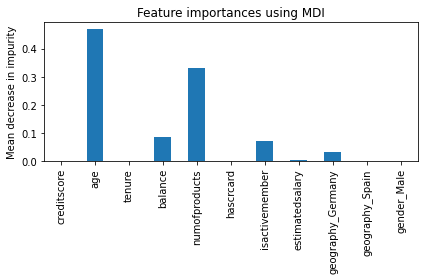

In [87]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
feature_names = [f'{i}' for i in features_test.columns]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")данных
fig.tight_layout()

Метрика получилась лучше после обьединения данных

Теперь обучим RandomForest

In [88]:
joblib.load(filename_random_forest_upsample)

RandomForestClassifier(n_estimators=20, random_state=12345)

In [89]:
model = RandomForestClassifier(random_state=12345, n_estimators=17)

In [90]:
model.fit(features_upsampled_train_valid, target_upsampled_train_valid)

RandomForestClassifier(n_estimators=17, random_state=12345)

In [91]:
predict_test = model.predict(features_test)
probabilities_one_valid = model.predict_proba(features_test)[:,1]
print('f1_score =',f1_score(target_test, predict_test))
print('roc_auc_score =',roc_auc_score(target_test, probabilities_one_valid))


f1_score = 0.5822784810126582
roc_auc_score = 0.8352409263781516


Посмотрим на важность параметров модели

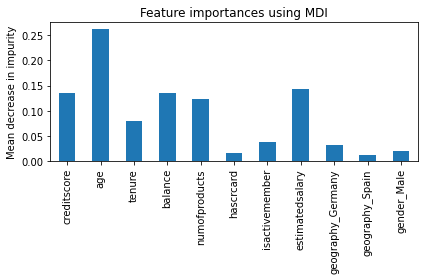

In [92]:
importances = model.feature_importances_
feature_names = [f'{i}' for i in features_test.columns]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout() 

Предсказания стали чуть хуже нежели которые были получены в предыдущем пунке, также стоит отметить что в обеих случая метрики оказались равны, поэтому в данном случае обе модели оказались равноценны.

**Вывод**

Обе модели ведут себя одинаково 'в бою' и применение любой из них к тестовым данным равноценно. Также можно заметить значительную разницу в важности параметров для разных моделей, в случае RandomForest принимаются во внимание все параметры в отличие от DecisionTree, что скорее всего не может не скзаать на скорости работы самой модели
